In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from numpy.linalg import norm
from tensorflow.keras import Sequential, Model
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,preprocess_input

In [6]:
class features_extraction:
    def __init__(self):
        base_path = os.getcwd()
        model_path = os.path.join(base_path, 'models')
        features_list_path = os.path.join(model_path, 'v2features.pkl')
        filenames_path = os.path.join(model_path, 'filepath.pkl')
        data_path = os.path.join(base_path, 'data_produk_tkquick.csv')
        
    def load_model(self, feature_list_path, filenames_path):
        model = ResNet50V2(weights='imagenet',include_top=False,input_shape=(224,224,3))
        model.trainable = False

        model = Sequential([
            model,
            GlobalMaxPooling2D()
        ])

        feature_list = np.array(pickle.load(open(feature_list_path, 'rb')))
        filenames = pickle.load(open(filenames_path, 'rb'))

        new_filenames = [f"dataset/{data.split('/')[-2:][0]}/{data.split('/')[-2:][1]}" for data in filenames]

        return model, feature_list, new_filenames
    
    def get_product_id(self, data_path, product):
        df_data = pd.read_csv(data_path)
        nn = []
        for nama in df_data.values:
            new_nama = str(nama[1]).replace('/', '_')
            nn.append(new_nama)
        df_data['NewName'] = nn
        df_data.drop(columns=['PdNama'], inplace=True)
        result = [data_num[0] for data_num in df_data.values if data_num[1] in product]
        return result

    def get_prediction(self, query_image, model, feature_list, filenames, show_image=True):
        base_path = os.getcwd()
        data_path = os.path.join(base_path, 'data_produk_tkquick.csv')
        
        img = load_img(query_image,target_size=(224,224))
        img_array = img_to_array(img)
        expanded_img_array = np.expand_dims(img_array, axis=0)
        preprocessed_img = preprocess_input(expanded_img_array)
        result = model.predict(preprocessed_img).flatten()
        normalized_result = result / norm(result)

        neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine')
        neighbors.fit(feature_list)

        distances,indices = neighbors.kneighbors([normalized_result])
        
        if show_image:
            self.show_image(query_image, 'query image')
            
        pred = []
        
        for i in range(5):
            index = indices[0][i]
            distance = distances[0][i]
            result = filenames[index].split('/')[-1].split('.jpg')[0]
            pred.append(result)
            
            if show_image:
                self.show_image(filenames[index], f"image result : {i+1},{filenames[index].split('/')[-1]}")
                
        return self.get_product_id(data_path, pred), pred

    def show_image(self, image_path, title):
        im = cv2.imread(image_path)
        plt.imshow(im)
        plt.title(title)
        plt.axis('off')
        plt.show()

1/1 [==============================] - 1s 620ms/step


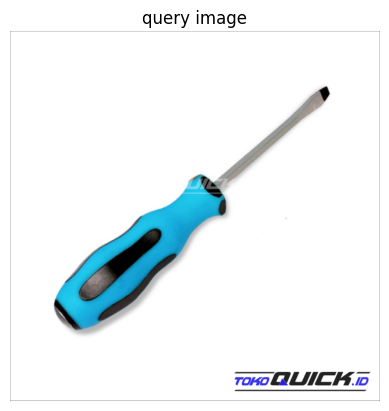

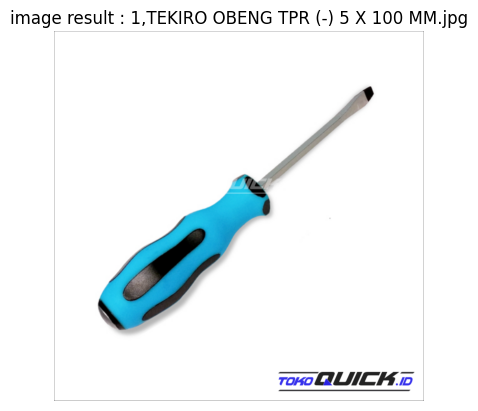

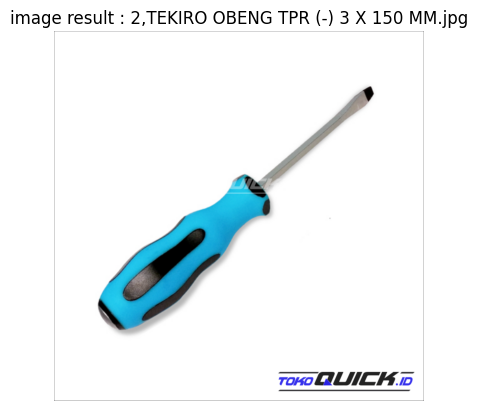

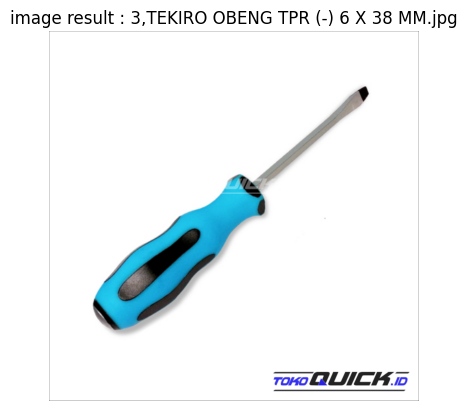

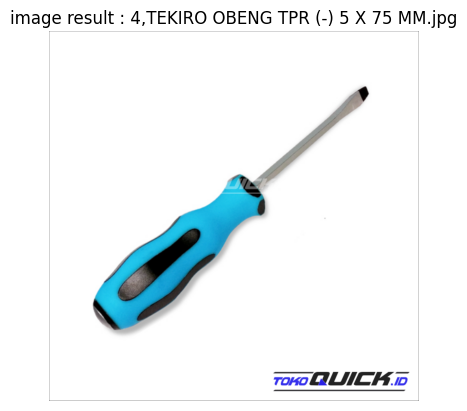

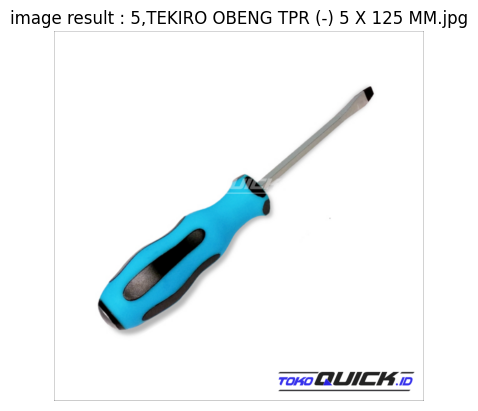

2.75

In [7]:
import time
start_time = time.time()
main = features_extraction()
model, feature_list, filenames = main.load_model(features_list_path, filenames_path)
id_product, nama_product = main.get_prediction('test/test2.jpg', model, feature_list, filenames, show_image=True)
round(time.time() - start_time, 2)

In [4]:
base_path = os.getcwd()
model_path = os.path.join(base_path, 'models')
features_list_path = os.path.join(model_path, 'v2features.pkl')
filenames_path = os.path.join(model_path, 'filepath.pkl')
data_path = os.path.join(base_path, 'data_produk_tkquick.csv')

In [ ]:
def load_model(feature_list_path, filenames_path):
    model = ResNet50V2(weights='imagenet',include_top=False,input_shape=(224,224,3))
    model.trainable = False

    model = Sequential([
        model,
        GlobalMaxPooling2D()
    ])
    
    feature_list = np.array(pickle.load(open(feature_list_path, 'rb')))
    filenames = pickle.load(open(filenames_path, 'rb'))
    
    new_filenames = [f"dataset/{data.split('/')[-2:][0]}/{data.split('/')[-2:][1]}" for data in filenames]

    return model, feature_list, new_filenames

In [ ]:
def get_product_id(data_path, product):
    df_data = pd.read_csv(data_path)
    nn = []
    for nama in df_data.values:
        new_nama = str(nama[1]).replace('/', '_')
        nn.append(new_nama)
    df_data['NewName'] = nn
    df_data.drop(columns=['PdNama'], inplace=True)
    result = [data_num[0] for data_num in df_data.values if data_num[1] in product]
    return result

In [ ]:
def get_prediction(query_image, model, feature_list, filenames):
    base_path = os.getcwd()
    data_path = os.path.join(base_path, 'data_produk_tkquick.csv')
    img = load_img(query_image,target_size=(224,224))
    img_array = img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine')
    neighbors.fit(feature_list)

    distances,indices = neighbors.kneighbors([normalized_result])
    show_image(query_image, 'query image')
    pred = []
    for i in range(5):
        index = indices[0][i]
        distance = distances[0][i]
        result = filenames[index].split('/')[-1].split('.jpg')[0]
        pred.append(result)
        show_image(filenames[index], f"image result : {i+1},{filenames[index].split('/')[-1]}")
        
        
    return get_product_id(data_path, pred), pred

In [ ]:
def show_image(image_path, title):
    im = cv2.imread(image_path)
    plt.imshow(im)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
model, feature_list, filenames = load_model(features_list_path, filenames_path)
id_product, nama_product = get_prediction('test/test2.jpg', model, feature_list, filenames)

In [ ]:
id_product, nama_product

In [ ]:
data = pd.read_csv('data_produk_tkquick.csv')
data.head()

In [ ]:
data.shape

In [ ]:
feature_list = np.array(pickle.load(open('models/1 embeddings.pkl', 'rb')))
filenames = pickle.load(open('models/1 filenames.pkl', 'rb'))

In [ ]:
new_filenames = [data.split('/')[-1] for data in filenames]

In [ ]:
len(new_filenames)

In [ ]:
# untuk keperluan tabel baru dengan format / diganti _
nn = []
for nama in data.values:
    new_nama = str(nama[1]).replace('/', '_')
    nn.append(new_nama)
len(nn)

In [ ]:
data['NewName'] = nn
data.drop(columns=['PdNama'], inplace=True)

In [ ]:
data.tail()

In [ ]:
filter_a = ['TEKIRO OBENG TPR (-) 5 X 100 MM.jpg', 'TEKIRO OBENG TPR (-) 3 X 150 MM.jpg', 'TEKIRO OBENG TPR (-) 6 X 38 MM.jpg', 'TEKIRO OBENG TPR (-) 5 X 75 MM.jpg', 'TEKIRO OBENG TPR (-) 5 X 125 MM.jpg']
result = [data_num[0] for data_num in data.values if data_num[1] in filter_a]

In [ ]:
result

In [ ]:
filter_a = ['TEKIRO OBENG TPR (-) 5 X 100 MM.jpg', 'TEKIRO OBENG TPR (-) 3 X 150 MM.jpg', 'TEKIRO OBENG TPR (-) 6 X 38 MM.jpg', 'TEKIRO OBENG TPR (-) 5 X 75 MM.jpg', 'TEKIRO OBENG TPR (-) 5 X 125 MM.jpg']
for data in filter_a:
    print(data.split('.jpg')[0])